In [1]:
import numpy as np
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt

In [2]:
def f(x): # function to be minimized
    return (x[0]**6)/3 - 2.1*(x[0]**4) + 4*(x[1]**4) + x[0]*x[1] + 4*(x[0]**2 - x[1]**2)

def grad_f(x): # gradient of the function
    return np.array([2*(x[0]**5) - 8.4*(x[0]**3) + 8*x[0] + x[1],
                     16*(x[1]**3) + x[0] - 8*x[1]])

def h(x): # constraint function
    return x[0] + x[1] - 0.6228

def grad_h(x): # gradient of the constraint function
    return np.array([1, 1])

def lagrangian(x, l): # lagrangian function
    return f(x) + l*h(x)

def grad_lagrangian(x, l): # gradient of the lagrangian function
    arr = np.array([grad_f(x) + l*grad_h(x), h(x)], dtype=object)
    return np.concatenate((arr[0], [arr[1]]))

"""
    Since the solution to the problem can be found by solving for the roots of the gradient of the lagrangian, we will use Newton's method to find the roots. Taking the gradient of the lagrangian as the function and its jacobian as the derivative, we will find the roots of the gradient of the lagrangian.
"""

def jacobian_lagrangian(x,l): # jacobian of the lagrangian function
    return np.array([[10*(x[0]**4) - 25.2*(x[0]**2) + 8, 1, 1],[1, 48*x[1]**2-8, 1],[1, 1 ,0]])

In [3]:
x = [1, -1] # initial guess
l = np.pi # initial guess
epsilon = 1e-5 # tolerance
x_exp = np.array([x[0], x[1], l])
x_list = [x_exp]

In [4]:
while True:
    prev_x = x_exp
    dx = solve(jacobian_lagrangian([x_exp[0],x_exp[1]],x_exp[2]).T@jacobian_lagrangian([x_exp[0],x_exp[1]],x_exp[2]), -jacobian_lagrangian([x_exp[0],x_exp[1]],x_exp[2]).T@grad_lagrangian([x_exp[0],x_exp[1]],x_exp[2])) # Newton's method
    x_exp = x_exp + dx
    x_list.append([x_exp[0],x_exp[1],x_exp[2]])
    if norm(x_exp - prev_x) < epsilon: # check for convergence
        break
x_list = np.array(x_list, dtype=object)

In [5]:
print("Minimum:", f(x_list[:,:2].T)[-1])
print("Minima:", x_list[-1][:2])
print("Value of λ:", x_list[-1][2])

Minimum: 0.13926909552802247
Minima: [1.4914150323825432 -0.8686150323825433]
Value of λ: 2.04547523187906


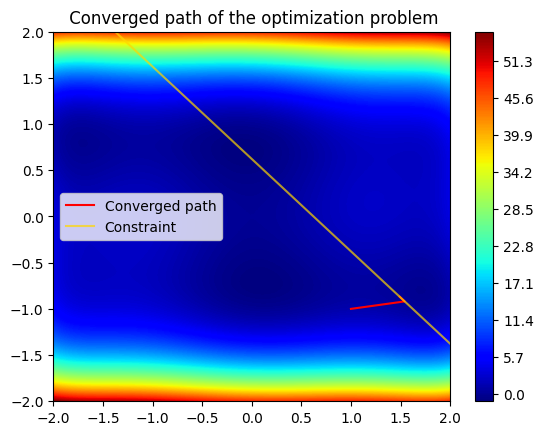

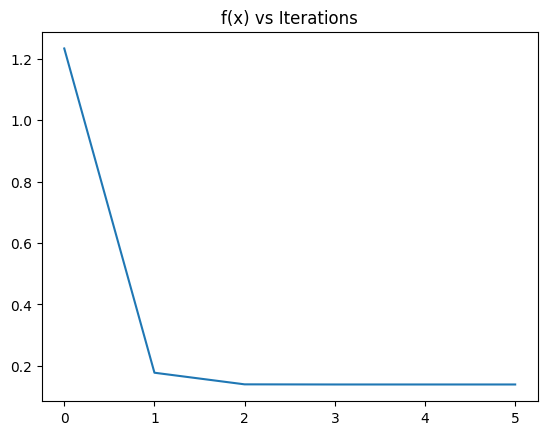

In [6]:
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100) 
X,Y = np.meshgrid(X,Y)
X1 = np.linspace(-2+0.6228, 2, 100)

# Plots
plt.contourf(X,Y,f([X,Y]), 1000, cmap='jet')
plt.plot(x_list[:,0], x_list[:,1], 'r', label='Converged path')
plt.plot(X1, 0.6228 - X1, 'gold', label='Constraint', alpha=0.7)
plt.colorbar()
plt.legend(loc='center left')
plt.title(" Converged path of the optimization problem")
plt.show()
plt.plot(f(x_list.T))
plt.title('f(x) vs Iterations')
plt.show()